# 1-click execution of Dreambooth Stable Diffusion
- Aug 16, 2023 - Custom model output name.
- July 19,2023 - Updated accelerate version, again.
- Jun 8, 2023 - Updated accelerate version.
- May 24, 2023 - Fixed pytorch version error, again.



Tutorials and prompts at [stable-diffusion-art.com](https://stable-diffusion-art.com)

The latest copy can be found [here](https://colab.research.google.com/github/sagiodev/stablediffusion_webui/blob/master/DreamBooth_Stable_Diffusion_SDA.ipynb).

Modified from [Shivam Shrirao](https://github.com/ShivamShrirao/diffusers/tree/main/examples/dreambooth)'s repo.

Instructions - See [acommpanying article](https://stable-diffusion-art.com/dreambooth/) for step-by-step walkthrough. Leave comment under article if you have any questions.
1. Make sure your Google Drive has at least 2GB (4GB if `fp16` is not checked)
2. Prepare you custom image to be 512x512 pixels.
1. Run the first cell by clicking the play button.
2. Grant access to Google Drive.
3. Click "Choose files" to upload your images
4. After it is complete (800 steps should take 30 mins), go to your [Google Drive](https://drive.google.com/drive/my-drive) to download your model in folder Dreambooth_model
5. Use the 2nd cell to generate new images using the new model.



In [ ]:
# stabilityai/stable-diffusion-xl-base-1.5
# runwayml/stable-diffusion-v1-5
# AI_PICS/models/my_dreambooth_model.ckpt

Mounted at /content/drive
Tesla T4, 15360 MiB, 15101 MiB
[*] Weights will be saved at /content/stable_diffusion_weights/output
Uploading instance images for `photo of restaurant menu`


Saving menu1.png to menu1.png
Saving menu2.png to menu2.png
Saving menu3.png to menu3.png
Saving menu4.png to menu4.png
Saving menu5.png to menu5.png
Saving menu6.png to menu6.png
Saving menu7.png to menu7.png
Saving menu8.png to menu8.png
Saving menu9.png to menu9.png
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.0.1+cu118 requires triton==2.0.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 2.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

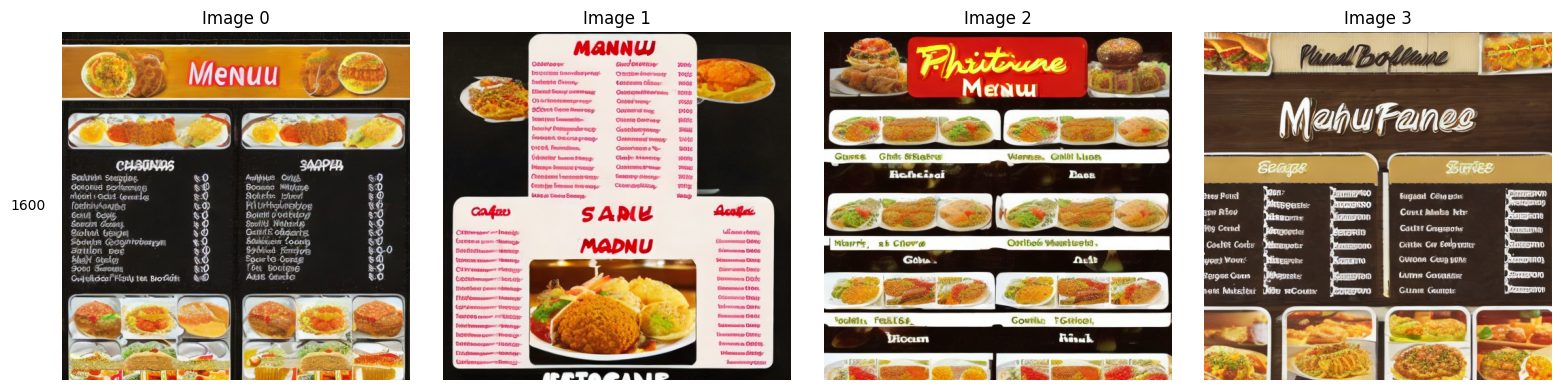

In [1]:
import time
time_start = time.time()
#@title DreamBooth
HUGGINGFACE_TOKEN = ""

#@markdown Name/Path of the initial model. (Find model name [here](https://huggingface.co/models))
MODEL_NAME = "runwayml/stable-diffusion-v1-5" #@param {type:"string"}
BRANCH = "fp16" #@param {type:"string"}

#@markdown Enter instance prompt and class prompt.\
#@markdown Example 1: photo of zwx person, photo of a person\
#@markdown Example 2: photo of zwx toy, photo of a toy
instance_prompt = "photo of restaurant menu" #@param {type:"string"}
class_prompt =  "photo of menu" #@param {type:"string"}
training_steps = 1600 #@param {type:"integer"}
learning_rate = 1e-6 #@param {type:"number"}
output_file = "/content/gdrive/MyDrive/ML1_Training/stable_diffusion/1/my_dreambooth_model.ckpt" #@param {type:"string"}
#@markdown  Convert to fp16? (takes half the space (2GB)).
fp16 = True #@param {type: "boolean"}
#@markdown  Compile xformers (Try only if you see xformers error. Will take 1 more hour).
complie_xformers = False #@param {type: "boolean"}

save_to_gdrive = True
from google.colab import drive
if save_to_gdrive:
  drive.mount('/content/drive')


#@markdown Clear log after run?
CLEAR_LOG = False #@param {type:"boolean"}


OUTPUT_DIR = "stable_diffusion_weights/output"
OUTPUT_DIR = "/content/" + OUTPUT_DIR

# Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

print(f"[*] Weights will be saved at {OUTPUT_DIR}")

!mkdir -p $OUTPUT_DIR


# You can also add multiple concepts here. Try tweaking `--max_train_steps` accordingly.

concepts_list = [
    {
        "instance_prompt":      instance_prompt,
        "class_prompt":         class_prompt,
        "instance_data_dir":    "/content/data/instance",
        "class_data_dir":       "/content/data/class"
    },
#     {
#         "instance_prompt":      "photo of ukj person",
#         "class_prompt":         "photo of a person",
#         "instance_data_dir":    "/content/data/ukj",
#         "class_data_dir":       "/content/data/person"
#     }
]

# `class_data_dir` contains regularization images
import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)


import os
from google.colab import files
import shutil

for c in concepts_list:
    print(f"Uploading instance images for `{c['instance_prompt']}`")
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(c['instance_data_dir'], filename)
        shutil.move(filename, dst_path)


def clear():
    from IPython.display import clear_output; return clear_output()



# huggingface token
!mkdir -p ~/.huggingface
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token


# install repos
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
#%pip install torch==2.0.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers
# install xformer wheel
print('Install xformers')
if complie_xformers:
  %pip install git+https://github.com/facebookresearch/xformers@4c06c79#egg=xformers
#else:
#  %pip install  --no-deps -q https://github.com/brian6091/xformers-wheels/releases/download/0.0.15.dev0%2B4c06c79/xformers-0.0.15.dev0+4c06c79.d20221205-cp38-cp38-linux_x86_64.whl
#%pip install -q https://github.com/metrolobo/xformers_wheels/releases/download/4c06c79_various6/xformers-0.0.15.dev0_4c06c79.d20221201-cp38-cp38-linux_x86_64.whl
#%pip install -q https://github.com/ShivamShrirao/xformers-wheels/releases/download/4c06c79/xformers-0.0.15.dev0+4c06c79.d20221201-cp38-cp38-linux_x86_64.whl


############## Edit this section to customize parameters
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$OUTPUT_DIR \
  --revision=$BRANCH \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1337 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=50 \
  --sample_batch_size=4 \
  --max_train_steps=$training_steps \
  --save_interval=10000 \
  --save_sample_prompt="$instance_prompt" \
  --concepts_list="concepts_list.json"

########################################

# Reduce the `--save_interval` to lower than `--max_train_steps` to save weights from intermediate steps.
# `--save_sample_prompt` can be same as `--instance_prompt` to generate intermediate samples (saved along with weights in samples directory).

from natsort import natsorted
from glob import glob
import os
weightdirs = natsorted(glob(OUTPUT_DIR + os.sep + "*"))
if len(weightdirs) == 0:
  raise KeyboardInterrupt("No training weights directory found")
WEIGHTS_DIR = weightdirs[-1]


ckpt_path = WEIGHTS_DIR + "/model.ckpt"

half_arg = ""
if fp16:
    half_arg = "--half"
!python convert_diffusers_to_original_stable_diffusion.py --model_path $WEIGHTS_DIR  --checkpoint_path $ckpt_path $half_arg
print(f"[*] Converted ckpt saved at {ckpt_path}")


if CLEAR_LOG:
  clear()

print(f"[*] WEIGHTS_DIR={WEIGHTS_DIR}")
minutes = (time.time()-time_start)/60
print("Dreambooth completed successfully. It took %1.1f minutes."%minutes)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

weights_folder = OUTPUT_DIR
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key=lambda x: int(x))

row = len(folders)
col = len(os.listdir(os.path.join(weights_folder, folders[0], "samples")))
scale = 4
fig, axes = plt.subplots(row, col, figsize=(col*scale, row*scale), gridspec_kw={'hspace': 0, 'wspace': 0})

for i, folder in enumerate(folders):
    folder_path = os.path.join(weights_folder, folder)
    image_folder = os.path.join(folder_path, "samples")
    images = [f for f in os.listdir(image_folder)]
    for j, image in enumerate(images):
        if row == 1:
            currAxes = axes[j]
        else:
            currAxes = axes[i, j]
        if i == 0:
            currAxes.set_title(f"Image {j}")
        if j == 0:
            currAxes.text(-0.1, 0.5, folder, rotation=0, va='center', ha='center', transform=currAxes.transAxes)
        image_path = os.path.join(image_folder, image)
        img = mpimg.imread(image_path)
        currAxes.imshow(img, cmap='gray')
        currAxes.axis('off')

plt.tight_layout()
plt.savefig('grid.png', dpi=72)

if save_to_gdrive:
  # make output dir if not exist
  import os.path
  gPath = '/content/drive/MyDrive/' + os.path.dirname(output_file)
  !mkdir -p $gPath

  # save model file. Save to a new name if already exist.
  filename = os.path.basename(output_file)
  fileanmeWithoutExt = os.path.splitext(filename)[0]
  ExtName = os.path.splitext(filename)[1]
  filenamePattern = fileanmeWithoutExt + '%d' + ExtName
  i = 1
  ckpt_gpath = gPath + '/' + filename
  while os.path.isfile(ckpt_gpath):
    filename = filenamePattern%i
    ckpt_gpath = gPath + '/' + filename
    i += 1
  ckpt_gpath = gPath + '/' + filename
  !cp $ckpt_path $ckpt_gpath
  print('Model saved to %s'%ckpt_gpath)


  0%|          | 0/10 [00:00<?, ?it/s]

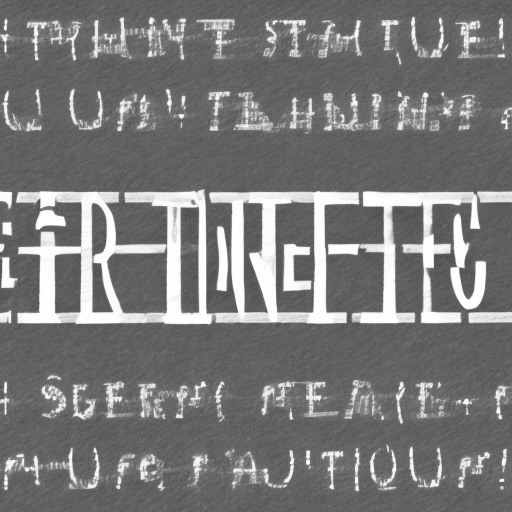

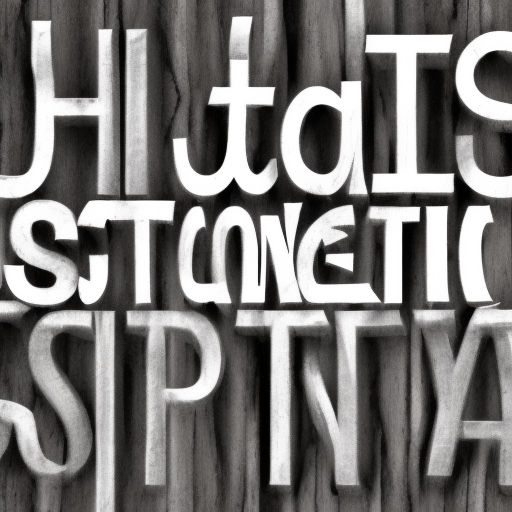

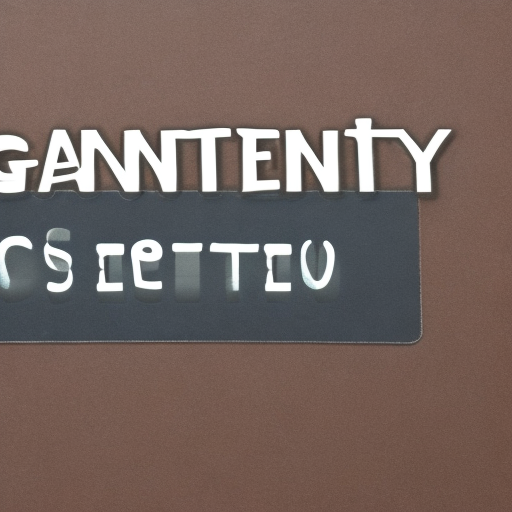

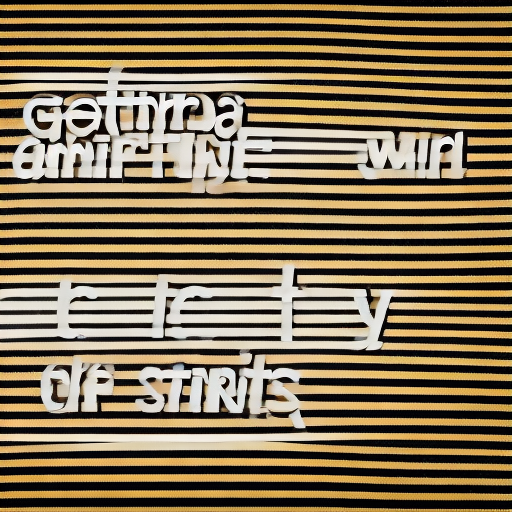

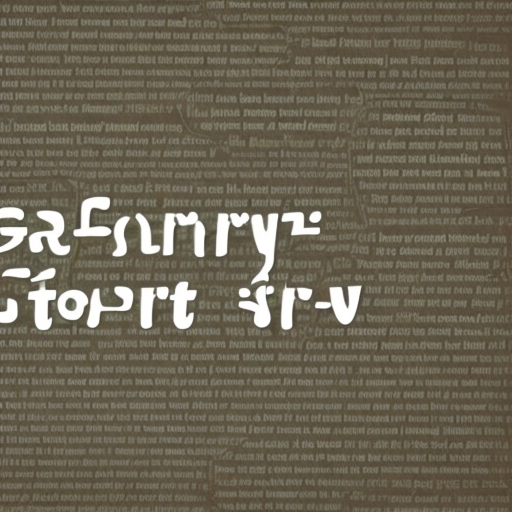

In [3]:
#@title Test image generation from model

prompt = "generate a short story text" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_samples = 5 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 10 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}
seed = 100 #@param {type:"number"}


import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = WEIGHTS_DIR             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive
if 'pipe' not in locals():
  scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
  pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")
  g_cuda = None



g_cuda = torch.Generator(device='cuda')

g_cuda.manual_seed(seed)


with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)

In [4]:
#@markdown Run Gradio UI for generating images.
import gradio as gr

def inference(prompt, negative_prompt, num_samples, height=512, width=512, num_inference_steps=50, guidance_scale=7.5):
    with torch.autocast("cuda"), torch.inference_mode():
        return pipe(
                prompt, height=int(height), width=int(width),
                negative_prompt=negative_prompt,
                num_images_per_prompt=int(num_samples),
                num_inference_steps=int(num_inference_steps), guidance_scale=guidance_scale,
                generator=g_cuda
            ).images

with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            prompt = gr.Textbox(label="Prompt", value="photo of zwx dog in a bucket")
            negative_prompt = gr.Textbox(label="Negative Prompt", value="")
            run = gr.Button(value="Generate")
            with gr.Row():
                num_samples = gr.Number(label="Number of Samples", value=4)
                guidance_scale = gr.Number(label="Guidance Scale", value=7.5)
            with gr.Row():
                height = gr.Number(label="Height", value=512)
                width = gr.Number(label="Width", value=512)
            num_inference_steps = gr.Slider(label="Steps", value=50)
        with gr.Column():
            gallery = gr.Gallery()

    run.click(inference, inputs=[prompt, negative_prompt, num_samples, height, width, num_inference_steps, guidance_scale], outputs=gallery)

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.


In [5]:
#@title (Optional) Delete diffuser and old weights and only keep the ckpt to free up drive space.

#@markdown [ ! ] Caution, Only execute if you are sure u want to delete the diffuser format weights and only use the ckpt.
import shutil
from glob import glob
import os
for f in glob(OUTPUT_DIR+os.sep+"*"):
    if f != WEIGHTS_DIR:
        shutil.rmtree(f)
        print("Deleted", f)
for f in glob(WEIGHTS_DIR+"/*"):
    if not f.endswith(".ckpt") or not f.endswith(".json"):
        try:
            shutil.rmtree(f)
        except NotADirectoryError:
            continue
        print("Deleted", f)

Deleted /content/stable_diffusion_weights/output/0
Deleted /content/stable_diffusion_weights/output/1600/scheduler
Deleted /content/stable_diffusion_weights/output/1600/tokenizer
Deleted /content/stable_diffusion_weights/output/1600/vae
Deleted /content/stable_diffusion_weights/output/1600/feature_extractor
Deleted /content/stable_diffusion_weights/output/1600/unet
Deleted /content/stable_diffusion_weights/output/1600/samples
Deleted /content/stable_diffusion_weights/output/1600/text_encoder


# Start Training

Use the table below to choose the best flags based on your memory and speed requirements. Tested on Tesla T4 GPU.


| `fp16` | `train_batch_size` | `gradient_accumulation_steps` | `gradient_checkpointing` | `use_8bit_adam` | GB VRAM usage | Speed (it/s) |
| ---- | ------------------ | ----------------------------- | ----------------------- | --------------- | ---------- | ------------ |
| fp16 | 1                  | 1                             | TRUE                    | TRUE            | 9.92       | 0.93         |
| no   | 1                  | 1                             | TRUE                    | TRUE            | 10.08      | 0.42         |
| fp16 | 2                  | 1                             | TRUE                    | TRUE            | 10.4       | 0.66         |
| fp16 | 1                  | 1                             | FALSE                   | TRUE            | 11.17      | 1.14         |
| no   | 1                  | 1                             | FALSE                   | TRUE            | 11.17      | 0.49         |
| fp16 | 1                  | 2                             | TRUE                    | TRUE            | 11.56      | 1            |
| fp16 | 2                  | 1                             | FALSE                   | TRUE            | 13.67      | 0.82         |
| fp16 | 1                  | 2                             | FALSE                   | TRUE            | 13.7       | 0.83          |
| fp16 | 1                  | 1                             | TRUE                    | FALSE           | 15.79      | 0.77         |
